# Decision Tree - Weather DataSet



OBJETIVO:  Mostrar a árvore gerada, a matriz de confusão, as métricas do modelo, e as regras geradas com as respectivas coberturas. 

In [22]:
# Importando bibliotecas
import pandas as pd
from sklearn import tree
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier

import pydot
import pydotplus

In [23]:
# Ler dados do DataSet
csv_dir = "/content/weather.nominal.csv"
data = pd.read_csv(csv_dir, delimiter=",")

weatherMostrando a tabela que foi lida do Dataset weather, e tratar os dados.

In [24]:
data

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


O tratamento de dados do Dataset foi feito da seguinte forma:
- Armazenando em uma variável a coluna de classificação.
- Armazenando em uma variável as colunas necessarias para o treinamento.

In [25]:
classification_col = data['play']
treinamento = data[['outlook', 'temperature', 'humidity', 'windy']]

Mostrando a coluna tratada de classificação.

In [26]:
classification_col

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: play, dtype: object

Mostrando as colunas retiradas da tabela `data`, usadas para treinar a IA.

In [27]:
treinamento

,outlook,temperature,humidity,windy
0,sunny,hot,high,False
1,sunny,hot,high,True
2,overcast,hot,high,False
3,rainy,mild,high,False
4,rainy,cool,normal,False
5,rainy,cool,normal,True
6,overcast,cool,normal,True
7,sunny,mild,high,False
8,sunny,cool,normal,False
9,rainy,mild,normal,False


Transformar as colunas de treinamento em valores números para poder fazer a classificação:
- transformar todas as colunas em variáveis categóricas.  utilizando a biblioteca de pré-processamento do Scikit-Learn. 
- Transformar em valores numéricos, usando o LabelEncoder.
- transformar em valores de ponto flutuante.

In [28]:
def transformaNumerico(tabela_treinamento):
  for column in tabela_treinamento:
    tabela_treinamento[column] = tabela_treinamento[column].astype(str)
    le = preprocessing.LabelEncoder()
    tabela_treinamento[column] = le.fit_transform(tabela_treinamento[column])
  tabela_treinamento = tabela_treinamento.astype(float)
  return tabela_treinamento

In [ ]:
# Pegar a tabela de treinamento em formato númerico
treinamento = transformaNumerico(treinamento)

Treinar a árvore de decisão de classificação:
- Passar o critério de entropia a ser utilizado no cálculo de ganho dos atributos.
- Utilizar a árvore criada e passar por parâmetros no `.fit()` os dataset a serem usados para treinamento e classificação, respectivamente.

In [30]:
# Criando a árvore e definindo o criterio de criação usando entropia
tree_restaurant = DecisionTreeClassifier(criterion="entropy")
tree_train = tree_restaurant.fit(treinamento, classification_col)

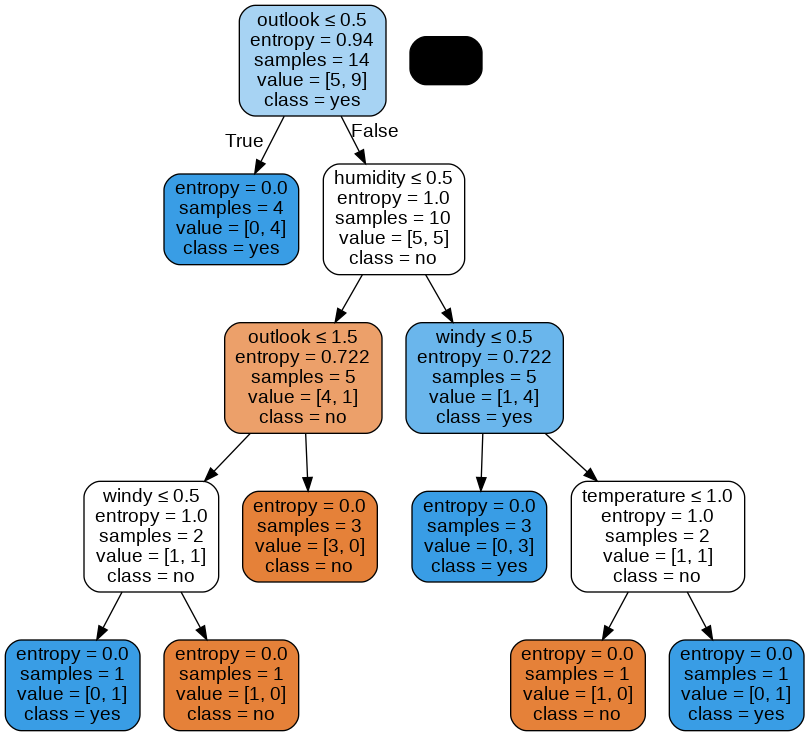

In [31]:
dot_data = tree.export_graphviz(tree_train, out_file=None,
                                feature_names=treinamento.columns.values,
                                class_names=classification_col.unique(),
                                filled=True, rounded=True,
                                special_characters=True)
graph = pydot.graph_from_dot_data(dot_data)
graph[0].write_png('tree_weather.png')

from IPython.display import Image
Image(filename='tree_weather.png')

Após criar a árvore deve ser mostrado ao usuário:
- Matriz de confusão.
- Métricas do modelo

In [32]:
# Importar a biblioteca para mostrar a matriz de confusão da árvore
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [33]:
# Pegar tabela de dados FAKES
csv_dir_fake = "/content/weather.nominal_fake.csv"
data_fake = pd.read_csv(csv_dir_fake, delimiter=",")

classification_col_fake = data_fake['play']
fake_treinamento = data_fake[['outlook', 'temperature', 'humidity', 'windy']]

In [ ]:
# Transformar o treinamento fake em dados númericos
fake_treinamento = transformaNumerico(fake_treinamento)

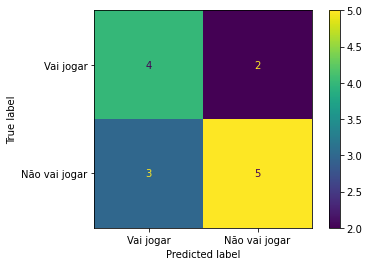

In [40]:
conf_matrix = confusion_matrix(classification_col_fake, tree_train.predict(fake_treinamento))
labels = ["Vai jogar", "Não vai jogar"]
cmd = ConfusionMatrixDisplay(conf_matrix, display_labels=labels)
cmd.plot(values_format="d")
plt.show()

In [36]:
# Importando bibliotecas para calcular métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [41]:
# Mostrar métricas
print("Accuracy score = ", accuracy_score(classification_col_fake, tree_train.predict(fake_treinamento)))
print('\n')
print(classification_report(classification_col_fake, tree_train.predict(fake_treinamento), target_names=labels))
print('\n')

tn, fp, fn, tp = confusion_matrix(classification_col_fake, tree_train.predict(fake_treinamento)).ravel()
tnr = tn / (tn + fp) # true negative rate 
fpr = fp / (tn + fp) # false positive rate 
fnr = fn / (fn + tp) # false negative rate 
tpr = tp / (tp + fn) # true positive rate
print('True negative rate: ' + str(tnr))
print('False positive rate: ' + str(fpr))
print('False negative rate: ' + str(fnr))
print('True positive rate: ' + str(tpr))


Accuracy score =  0.6428571428571429


               precision    recall  f1-score   support

    Vai jogar       0.57      0.67      0.62         6
Não vai jogar       0.71      0.62      0.67         8

     accuracy                           0.64        14
    macro avg       0.64      0.65      0.64        14
 weighted avg       0.65      0.64      0.64        14



True negative rate: 0.6666666666666666
False positive rate: 0.3333333333333333
False negative rate: 0.375
True positive rate: 0.625
